In [1]:
# Copyright (c) 2022 Neil Majithia
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

In [2]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import pandas as pd
import gc
import json


filename = r'simple simulator unemployment.xlsx'
plt.style.use('seaborn-poster')
display(widgets.HTML('''<style>
    p, h1, h2, h3, h4, ul, ol, li { max-width: 70vw !important; margin: 0px auto 5px auto !important;}
    img {max-width:  !important; display: block; margin: 0px auto 1px auto !important;}
    p, ul, ol { font-size: 1.4em !important}
    .widget-label { min-width: min-content !important; }
    /* .jp-RenderedHTMLCommon.jp-RenderedMarkdown.jp-MarkdownOutput { height: min-content; min-height: 35px;} */
</style>'''))
style = {'description_width': 'initial'}

HTML(value='<style>\n    p, h1, h2, h3, h4, ul, ol, li { max-width: 70vw !important; margin: 0px auto 5px auto…

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Understanding Inflation and Central Bank Policy Choices
</h1>

In [3]:
#Cache default values of the simulator in the Excel
shock_size = -0.03 
no_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767], [7, 97, 0.07619047619047614, 100, 11, 8, 4, 1, 101, 0.04761904761904767], [8, 97, 0.07619047619047614, 100, 14, 11, 4, 1, 101, 0.04761904761904767], [9, 97, 0.07619047619047614, 100, 17, 14, 4, 1, 101, 0.04761904761904767], [10, 97, 0.07619047619047614, 100, 20, 17, 4, 1, 101, 0.04761904761904767], [11, 97, 0.07619047619047614, 100, 23, 20, 4, 1, 101, 0.04761904761904767], [12, 97, 0.07619047619047614, 100, 26, 23, 4, 1, 101, 0.04761904761904767], [13, 97, 0.07619047619047614, 100, 29, 26, 4, 1, 101, 0.04761904761904767], [14, 97, 0.07619047619047614, 100, 32, 29, 4, 1, 101, 0.04761904761904767], [15, 97, 0.07619047619047614, 100, 35, 32, 4, 1, 101, 0.04761904761904767], [16, 97, 0.07619047619047614, 100, 38, 35, 4, 1, 101, 0.04761904761904767], [17, 97, 0.07619047619047614, 100, 41, 38, 4, 1, 101, 0.04761904761904767], [18, 97, 0.07619047619047614, 100, 44, 41, 4, 1, 101, 0.04761904761904767], [19, 97, 0.07619047619047614, 100, 47, 44, 4, 1, 101, 0.04761904761904767], [20, 97, 0.07619047619047614, 100, 50, 47, 4, 1, 101, 0.04761904761904767], [21, 97, 0.07619047619047614, 100, 53, 50, 4, 1, 101, 0.04761904761904767], [22, 97, 0.07619047619047614, 100, 56, 53, 4, 1, 101, 0.04761904761904767], [23, 97, 0.07619047619047614, 100, 59, 56, 4, 1, 101, 0.04761904761904767], [24, 97, 0.07619047619047614, 100, 62, 59, 4, 1, 101, 0.04761904761904767], [25, 97, 0.07619047619047614, 100, 65, 62, 4, 1, 101, 0.04761904761904767], [26, 97, 0.07619047619047614, 100, 68, 65, 4, 1, 101, 0.04761904761904767], [27, 97, 0.07619047619047614, 100, 71, 68, 4, 1, 101, 0.04761904761904767], [28, 97, 0.07619047619047614, 100, 74, 71, 4, 1, 101, 0.04761904761904767], [29, 97, 0.07619047619047614, 100, 77, 74, 4, 1, 101, 0.04761904761904767]]'
no_policy = json.loads(no_policy)

before_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767]]'
before_policy = json.loads(before_policy)

after_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]]'
after_policy = json.loads(after_policy)

In [4]:
def PlotStuff(exceloutputs:list, title, after = False, show=True, auto=False, legend=False, shockline=True, shocktext=False, recoverytext=False):
    '''Plots inflation and unemployment on side-by-side subplots'''
    colourlist = ['#f05a5b', 'grey', 'pink']
    figs, axs = plt.subplots(1, 4, figsize=[24, 8])
    for data in exceloutputs:
        colour = colourlist[exceloutputs.index(data)]
        if after:
            axs[0].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][4] for i in range(1, len(data)-1)], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][3] for i in range(1, len(data)-1)], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data)-1)], [100*data[i][-1] for i in range(1, len(data)-1)], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-2)], [data[i][-3] for i in range(1, len(data)-2)], colour)
            axs[0].plot([data[-2][0], data[-1][0]], [data[-2][4], data[-1][4]], 'black')
            axs[1].plot([data[-2][0], data[-1][0]], [data[-2][3], data[-1][3]], 'black')
            axs[2].plot([data[-2][0], data[-1][0]], [100*data[-2][-1], 100*data[-1][-1]], 'black')
            axs[3].plot([data[-3][0], data[-2][0]], [data[-3][-3], data[-2][-3]], 'black')
            axs[3].set_xlim(left=0.75, right=6.25)

        else:
            axs[0].plot([data[i][0] for i in range(1, len(data))], [data[i][4] for i in range(1, len(data))], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data))], [data[i][3] for i in range(1, len(data))], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data))], [100*data[i][-1] for i in range(1, len(data))], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][-3] for i in range(1, len(data)-1)], colour)
            axs[0].plot(data[-1][0] + 1, data[-1][4])
            axs[1].plot(data[-1][0] + 1, data[-1][3])
            axs[2].plot(data[-1][0] + 1, 100*data[-1][-1])
            axs[3].plot(data[-1][0] + 1, data[-1][-3])
    axs[0].set_title('Inflation %')
    axs[1].set_title('GDP')
    axs[2].set_title('Unemployment %')
    axs[3].set_title('Real Interest Rate %')
    axs[0].set_xlabel('Period')
    axs[1].set_xlabel('Period')
    axs[2].set_xlabel('Period')
    axs[3].set_xlabel('Period')
    if shockline:
        axs[0].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[0].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
    if shocktext:
        axs[0].text(x=3.85, y=8.16, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[1].text(x=3.85, y=100.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[2].text(x=3.85, y=11.175, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[3].text(x=3.85, y=7.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
    if recoverytext:
            axs[0].text(x=5.3, y=8.15, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[1].text(x=5.3, y=100.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[2].text(x=5.3, y=11.125, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[3].text(x=5.3, y=7.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')


    if not auto:
        axs[0].set_ylim(bottom=1.5, top=9)
        axs[1].set_ylim(bottom=93.5, top=101.5)
        axs[2].set_ylim(bottom=4, top=12)
        axs[3].set_ylim(bottom=0.5, top=8.5)


    figs.suptitle(title, fontsize=16)
    
    if legend:
        label1 = mlines.Line2D([], [], color='#f05a5b', label='Your Choice')
        label2 = mlines.Line2D([], [], color='grey', label='Benchmark')
        axs[0].legend(handles=[label1, label2], bbox_to_anchor=(0.8, 1.2))
        # axs[0].legend(handles=[label1, label2])

    if show:
        plt.show()
    else:
        return figs, axs

def AppendtoPlot(figs, axs, new_excel):
    axs[0].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][4] for i in range(1, len(new_excel))])
    axs[1].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][3] for i in range(1, len(new_excel))])
    axs[2].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-1] for i in range(1, len(new_excel))])
    axs[3].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-3] for i in range(1, len(new_excel))])
    return figs, axs
    


October 2022: The job of central banks in these years is like riding a rollercoaster. After having to fight with deflationary forces arising from the financial crisis in the late 2000’s and from the 2020-2021 COVID-19 pandemic, inflation became the number one public enemy during 2022. Several shocks that range from the disruption in the global production chain to increasing commodity prices due to the Ukraine war have increased CPI inflation to levels incompatible with central banks’ mandate of price stability. (see Figure 1)

<img src='intrograph.jpg'>
<p style='text-align: center'>Figure 1
Source: ... </p>

Central bankers may yearn for past too-low inflation scenarios where, if successful, monetary policy could yield both price stability and lower unemployment. Instead, when negative supply shocks - like an oil shock - hit the economy central bankers face a nasty trade-off between price stability and unemployment, at least in the short run. Bringing inflation down to hit the target in the short run is technically possible but, is it worth the economic downturn and the increase in unemployment that this would entail? Most central banks consider that it is not since they take the inflation target as a medium run goal. Within this time frame central banks face two uncertainties that condition their decision. 
* First, how persistent are the underlying shocks and/or may there be in the near future counterbalancing disinflationary shocks? 
* Second, how anchored are inflation expectations to the central bank’s inflation target and how serious is the danger of second round effects? 
A tight disinflationary policy could produce needless suffering if the underlying inflationary forces dissipate in the near future. However, a too timid response of monetary policy to inflation may trigger de-anchoring and second round effects that would push inflation further away from the target.

This interactive simulation can help you to understand some of the monetary policy dilemmas faced by central banks in the wake of the pandemic and the war in Ukraine explained above. 
* All the sections share the common feature of representing an economy hit by an inflationary supply shock (think of an oil price shock). 
* First, as a benchmark, the consequences of the shock for inflation are  shown assuming that monetary policy is passive and that expected inflation is equal to last period’s inflation, i.e.inflation expectations are not anchored to the central bank’s inflation target. . 
* In the second section you take charge of monetary policy and use your interest rate choice to  change the consequences of the shock for the first period after the shock. Here you will experience the short run trade-off implied in this monetary policy decision. 
* In the third section you can compare the no-policy reaction benchmark with two alternative monetary policy paths: an active but too timid monetary policy and one that succeeds in reducing inflation. . 
* In the fourth section you can put yourself in the skin of central banks with different degrees of inflation aversion to see that optimal monetary policy is compatible with different degrees of tightening. 
* Finally, the last section introduces inflation anchoring for the first time. It reveals why anchoring inflation expectations is so important to central banks because it allows monetary policy to bring inflation back to the target quicker and with lower unemployment costs.


<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    The Supply Shock
</h2>

When the price of imported energy and or commodities goes up, certain goods such as fuel or food become more expensive for the consumer. Costs of production go up as well and firms try to pass-through these higher costs to final prices. These effects happen relatively quickly and concentrate in the first period, as shown in the figure below (Fig. 2). What happens in the following periods depends on policy. In the following sections you can explore different policy options and scenarios.

<img src="supplyshockintrograph.jpg">
<p style='text-align: center'>Figure 2</p>

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    No Policy Reaction
</h2>

<h3>If there is no policy response to the rise in inflation caused by the oil shock,  the situation quickly spirals out of control as inflation rises period by period (Fig. 3)</h3>

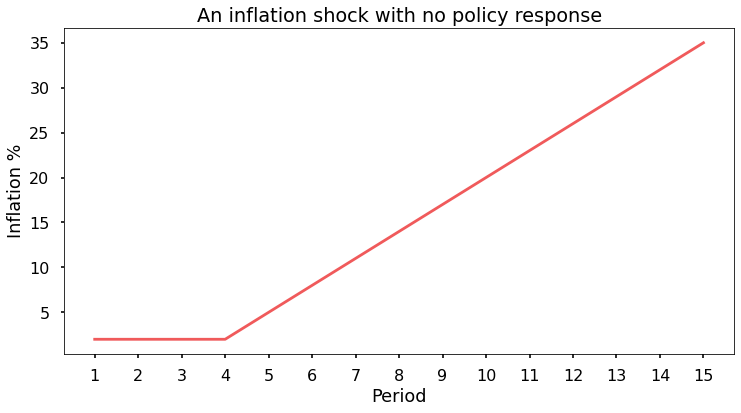

In [5]:
fig, ax = plt.subplots(1, 1, figsize = [12, 6])
ax.plot([no_policy[i][0] for i in range(1, 16)], [no_policy[i][4] for i in range(1, 16)], '#f05a5b')
ax.set_title('An inflation shock with no policy response')
ax.set_ylabel('Inflation %')
ax.set_xlabel('Period')
ax.xaxis.set_ticks(range(1, 16))

plt.show()

<p style='text-align: center'>Figure 3</p>

When the price of oil increases, inflation goes up in the shock period due to the increase in the price of fuel for consumers and the pass-through of the increase in firms’ costs to final prices. This increase in inflation has two effects relevant for next period:

* First, it reduces the purchasing power of workers, which means that workers’ real wages are below the level consistent with the state of the labour market. [The real wage shown by the PS curve falls below the real wage on the WS curve. i.e., the PS curve shifts down.]
* Second, the increase in inflation increases inflation expectations for the future. [The PC curve shifts up.]

Due to these two effects, in the next period nominal wages increase faster both to offset the loss in purchasing power due to the unexpected increase in past inflation and to avoid erosion of purchasing power due to higher expected inflation. Wage setters are frustrated in the attempt to restore the real wage to its initial level [on the WS curve]. Firms pass on the increase in unit labour costs arising from the rise in nominal wages to final prices to sustain their profit margin, increasing inflation above expected inflation. Therefore, in each period thereafter the attempt to restore workers’ purchasing power will maintain nominal wage growth and inflation above expected inflation, fueling an inflation spiral.

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    You choose: Monetary Policy Reaction to an Inflation Shock 
</h2>

<h3>There's been a permanent inflation shock in period 5.</h3> 


<p>Pretend you're the Central Bank - use the slider to choose a real interest rate for the next period to try and stabilise inflation, and note how your choice affects the rest of the economy too. </p>

In [6]:
out = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 auto 0 auto', 'max_width': '70vw'})
display(out)

Output(layout=Layout(border='2px solid gray', margin='0 auto 0 auto', max_width='70vw', padding='5px 5px 5px 5…

In [7]:
policy_results = '{"1": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767]], "2": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "3": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "4": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "6": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "7": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]]}'
policy_results = json.loads(policy_results)

In [8]:
r = widgets.IntSlider(1, 1, 7, description='Post-Shock Interest Rate')
sub = widgets.Button(description='Submit')
reset = widgets.Button(description='Reset')


with out:
    out.clear_output(wait=True)
    display(widgets.HBox((r, sub)))
    # display(before_policy)
    PlotStuff([before_policy], title='', shocktext=True, recoverytext=True, auto=False)
    display(widgets.HTML('<p style=\'text-align: center\'>Figure 4</p>'))


def on_sub(b):
    chosenrate = r.value
    after_policy = policy_results[str(chosenrate)]	
    with out:
        out.clear_output(wait=True)
        display(widgets.HBox((r, sub, reset)))
        display(widgets.HTML(f'<p>You chose a rate of {chosenrate}% - see below for its effects.</p>'))
        # display(excel.evaluate('simulator!H6'))
        # display(after_policy)
        PlotStuff([after_policy], title='', after=True, shocktext=True, recoverytext=True, auto=False)
        display(widgets.HTML('<p style=\'text-align: center\'>Figure 4</p>'))
        if chosenrate == 4:
            display(widgets.HTML('<h3>You have stabilised inflation - congratulations.</h3>'))
            display(widgets.HTML('<p>This is because you have chosen an interest rate equal to the stabilizing real interest rate [on the IS curve at the new lower equilibrium level of output]. However, your success in stopping the inflation spiral has been at the expense of an increase in unemployment. Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. [This is a move along the WS curve.] Now the wage-setting real wage exactly matches the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. Therefore, after your policy choice nominal wage growth and therefore actual inflation are equal to expected and past inflation. This is why inflation remains constant. [The PC curve does not shift upward.]</p>'))
            display(widgets.HTML('<h4>You have stabilized inflation but unemployment is higher and inflation, although stable, is higher than the central bank\'s target, which we assume was the pre-existing rate of inflation.</h4>'))
            print()
        elif 1 <= chosenrate < 4:
            display(widgets.HTML('<h3>Inflation is still getting higher, and meanwhile unemployment is getting worse too! </h3>'))
            display(widgets.HTML('<p>This is because you have chosen an interest rate lower than the stabilizing level. Therefore, you have not stopped the inflation spiral, although it proceeds more slowly after your policy choice. [The stabilizing real interest rate has gone up because equilibrium output is now lower.]</p>'))
            display(widgets.HTML('<p>By increasing the interest rate, you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. [This is a move along the WS curve.] Therefore, after the policy choice the wage-setting real wage is still higher than the real wage consistent with firms\' price-setting behaviour [the wage on the WS is still above that on the on the lower PS curve] and conditions in the labour market meant that wage setters still seek to increase the purchasing power of workers. Thus, they set nominal wage growth (and effectively, inflation) above expected and past inflation. This is why inflation is still on an upwards path, although a more moderate one due to the partial acceptance as a result of higher unemployment of the dent made in real wages by the shock.</p>'))
            display(widgets.HTML('<h4>With your policy choice you have driven the economy to a stagflation scenario, that is, a situation that combines an increase in both inflation and unemployment.</h4>'))
            print()
        elif 4 < chosenrate < 7:
            display(widgets.HTML('<h3>Inflation is heading back down to the central bank\'s target. This is because you have chosen an interest rate higher than the stabilizing level. However, employment is tanking due to your policy choice.</h3>'))
            display(widgets.HTML('<p>Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage [a move along the WS curve]. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and effectually inflation) below expected and past inflation. This is why inflation falls [the PC shifts down].</p>'))
            display(widgets.HTML('<h4>Despite your policy having reduced inflation, this is still higher than its pre-shock value. In the following periods you would need to keep the interest rate above its stabilizing level to drive inflation back to its pre-shock value (the central bank\'s target). [the PC would keep shifting down period by period]</h4>'))
            print()
        elif chosenrate == 7:
            display(widgets.HTML('<h3>You have chosen an interest rate higher than the equilibrium level and enough to drive inflation back to its pre-shock value. However, the cost of your policy shock in terms of unemployment is the highest.</h3>'))
            display(widgets.HTML('<p>Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage [a move along the WS curve]. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and effectually inflation) below expected and past inflation. This is why inflation falls [the PC shifts down].</p>'))
            display(widgets.HTML('<h4>Since you have hit the pre-shock inflation value (the central bank\'s target), then in the following period you would just need to adjust the interest rate to its equilibrium level. This is a \'shock therapy\' approach to the problem.</h4>'))
            print()

def on_reset(b):
    with out:
        out.clear_output(wait=True)
        display(widgets.HBox((r, sub)))
        # display(before_policy)
        PlotStuff([before_policy], title='', shocktext=True, recoverytext=True, auto=False)
        display(widgets.HTML('<p style=\'text-align: center\'>Figure 4</p>'))

sub.on_click(on_sub)
reset.on_click(on_reset)


<h3 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
   Test Yourself
</h3>

1. You can verify that choosing the appropriate interest rate, the central bank manages to bring the inflation back to target. But could the central bank do it even better, in terms of inflation? Discuss if the central bank could avoid the increase of inflation in the shock period. Why or why not?
2. Answer the following questions:

&ensp;&ensp;a. Choosing different values for the interest rate, try to gauge the sensitivity of GDP with respect to the interest rate and the slope coefficient for the Phillips curve (hint: both are integers).
    
&ensp;&ensp;b. There is evidence that the Phillips curve has flattened during the lasts decades (see, for instance, <a href='https://www.ecb.europa.eu/press/key/date/2021/html/ecb.sp211007~ab617e7d60.en.html'>Prospects for inflation: sneezes and breezes (europa.eu)</a>). Discuss how the flattening of the Phillips curve may affect the cost of bringing inflation down after the supply shock.

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
   Comparing Different Reactions by the Central Bank to an Oil Shock 
</h2>

<h3>In response to an inflation shock, a Central Bank could have different approaches to recovery - each with their own costs and benefits over both short and long term.</h3>

Use Figure 5 to explore the whole path of the economy following different policy choices.Look first at the path of the real interest rate to see what the Central Bank does; then look at the outcomes for the economy.


In [10]:
no_change_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767], [7, 97, 0.07619047619047614, 100, 11, 8, 4, 1, 101, 0.04761904761904767], [8, 97, 0.07619047619047614, 100, 14, 11, 4, 1, 101, 0.04761904761904767], [9, 97, 0.07619047619047614, 100, 17, 14, 4, 1, 101, 0.04761904761904767], [10, 97, 0.07619047619047614, 100, 20, 17, 4, 1, 101, 0.04761904761904767], [11, 97, 0.07619047619047614, 100, 23, 20, 4, 1, 101, 0.04761904761904767], [12, 97, 0.07619047619047614, 100, 26, 23, 4, 1, 101, 0.04761904761904767], [13, 97, 0.07619047619047614, 100, 29, 26, 4, 1, 101, 0.04761904761904767], [14, 97, 0.07619047619047614, 100, 32, 29, 4, 1, 101, 0.04761904761904767], [15, 97, 0.07619047619047614, 100, 35, 32, 4, 1, 101, 0.04761904761904767], [16, 97, 0.07619047619047614, 100, 38, 35, 4, 1, 101, 0.04761904761904767], [17, 97, 0.07619047619047614, 100, 41, 38, 4, 1, 101, 0.04761904761904767], [18, 97, 0.07619047619047614, 100, 44, 41, 4, 1, 101, 0.04761904761904767], [19, 97, 0.07619047619047614, 100, 47, 44, 4, 1, 101, 0.04761904761904767], [20, 97, 0.07619047619047614, 100, 50, 47, 4, 1, 101, 0.04761904761904767], [21, 97, 0.07619047619047614, 100, 53, 50, 4, 1, 101, 0.04761904761904767], [22, 97, 0.07619047619047614, 100, 56, 53, 4, 1, 101, 0.04761904761904767], [23, 97, 0.07619047619047614, 100, 59, 56, 4, 1, 101, 0.04761904761904767], [24, 97, 0.07619047619047614, 100, 62, 59, 4, 1, 101, 0.04761904761904767], [25, 97, 0.07619047619047614, 100, 65, 62, 4, 1, 101, 0.04761904761904767], [26, 97, 0.07619047619047614, 100, 68, 65, 4, 1, 101, 0.04761904761904767], [27, 97, 0.07619047619047614, 100, 71, 68, 4, 1, 101, 0.04761904761904767], [28, 97, 0.07619047619047614, 100, 74, 71, 4, 1, 101, 0.04761904761904767], [29, 97, 0.07619047619047614, 100, 77, 74, 4, 1, 101, 0.04761904761904767]]'
no_change_policy = json.loads(no_change_policy)

timid_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 2.5, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 98.5, 6.5, 5, 4, 1, 3.25, 101, 0.06190476190476191], [7, 97, 0.07619047619047614, 97.75, 7.25, 6.5, 4, 1, 3.625, 101, 0.06904761904761902], [8, 97, 0.07619047619047614, 97.375, 7.625, 7.25, 4, 1, 3.8125, 101, 0.07261904761904758], [9, 97, 0.07619047619047614, 97.1875, 7.8125, 7.625, 4, 1, 3.90625, 101, 0.07440476190476186], [10, 97, 0.07619047619047614, 97.09375, 7.90625, 7.8125, 4, 1, 3.953125, 101, 0.075297619047619], [11, 97, 0.07619047619047614, 97.046875, 7.953125, 7.90625, 4, 1, 3.9765625, 101, 0.07574404761904763], [12, 97, 0.07619047619047614, 97.0234375, 7.9765625, 7.953125, 4, 1, 3.98828125, 101, 0.07596726190476188], [13, 97, 0.07619047619047614, 97.01171875, 7.98828125, 7.9765625, 4, 1, 3.994140625, 101, 0.07607886904761907], [14, 97, 0.07619047619047614, 97.005859375, 7.994140625, 7.98828125, 4, 1, 3.9970703125, 101, 0.0761346726190476], [15, 97, 0.07619047619047614, 97.0029296875, 7.9970703125, 7.994140625, 4, 1, 3.99853515625, 101, 0.07616257440476193], [16, 97, 0.07619047619047614, 97.00146484375, 7.99853515625, 7.9970703125, 4, 1, 3.999267578125, 101, 0.07617652529761909], [17, 97, 0.07619047619047614, 97.000732421875, 7.999267578125, 7.99853515625, 4, 1, 3.9996337890625, 101, 0.07618350074404767], [18, 97, 0.07619047619047614, 97.0003662109375, 7.9996337890625, 7.999267578125, 4, 1, 3.99981689453125, 101, 0.0761869884672619], [19, 97, 0.07619047619047614, 97.00018310546875, 7.99981689453125, 7.9996337890625, 4, 1, 3.999908447265625, 101, 0.07618873232886902], [20, 97, 0.07619047619047614, 97.00009155273438, 7.999908447265625, 7.99981689453125, 4, 1, 3.9999542236328125, 101, 0.07618960425967258], [21, 97, 0.07619047619047614, 97.00004577636719, 7.9999542236328125, 7.999908447265625, 4, 1, 3.9999771118164062, 101, 0.07619004022507436], [22, 97, 0.07619047619047614, 97.0000228881836, 7.999977111816406, 7.9999542236328125, 4, 1, 3.999988555908203, 101, 0.07619025820777525], [23, 97, 0.07619047619047614, 97.0000114440918, 7.999988555908203, 7.999977111816406, 4, 1, 3.9999942779541016, 101, 0.07619036719912575], [24, 97, 0.07619047619047614, 97.0000057220459, 7.999994277954102, 7.999988555908203, 4, 1, 3.999997138977051, 101, 0.07619042169480095], [25, 97, 0.07619047619047614, 97.00000286102295, 7.999997138977051, 7.999994277954102, 4, 1, 3.9999985694885254, 101, 0.0761904489426386], [26, 97, 0.07619047619047614, 97.00000143051147, 7.999998569488525, 7.999997138977051, 4, 1, 3.9999992847442627, 101, 0.07619046256655737], [27, 97, 0.07619047619047614, 97.00000071525574, 7.999999284744263, 7.999998569488525, 4, 1, 3.9999996423721313, 101, 0.07619046937851681], [28, 97, 0.07619047619047614, 97.00000035762787, 7.999999642372131, 7.999999284744263, 4, 1, 3.9999998211860657, 101, 0.07619047278449653], [29, 97, 0.07619047619047614, 97.00000017881393, 7.999999821186066, 7.999999642372131, 4, 1, 3.999999910593033, 101, 0.07619047448748639]]'
timid_policy = json.loads(timid_policy)

optimal_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 4, 5.5, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 95.5, 3.5, 5, 4, 4, 4.75, 101, 0.09047619047619049], [7, 97, 0.07619047619047614, 96.25, 2.75, 3.5, 4, 4, 4.375, 101, 0.08333333333333337], [8, 97, 0.07619047619047614, 96.625, 2.375, 2.75, 4, 4, 4.1875, 101, 0.07976190476190481], [9, 97, 0.07619047619047614, 96.8125, 2.1875, 2.375, 4, 4, 4.09375, 101, 0.07797619047619042], [10, 97, 0.07619047619047614, 96.90625, 2.09375, 2.1875, 4, 4, 4.046875, 101, 0.07708333333333328], [11, 97, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4, 4, 4.0234375, 101, 0.07663690476190477], [12, 97, 0.07619047619047614, 96.9765625, 2.0234375, 2.046875, 4, 4, 4.01171875, 101, 0.07641369047619051], [13, 97, 0.07619047619047614, 96.98828125, 2.01171875, 2.0234375, 4, 4, 4.005859375, 101, 0.07630208333333333], [14, 97, 0.07619047619047614, 96.994140625, 2.005859375, 2.01171875, 4, 4, 4.0029296875, 101, 0.07624627976190479], [15, 97, 0.07619047619047614, 96.9970703125, 2.0029296875, 2.005859375, 4, 4, 4.00146484375, 101, 0.07621837797619047], [16, 97, 0.07619047619047614, 96.99853515625, 2.00146484375, 2.0029296875, 4, 4, 4.000732421875, 101, 0.0762044270833333], [17, 97, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4, 4, 4.0003662109375, 101, 0.07619745163690472], [18, 97, 0.07619047619047614, 96.9996337890625, 2.0003662109375, 2.000732421875, 4, 4, 4.00018310546875, 101, 0.07619396391369049], [19, 97, 0.07619047619047614, 96.99981689453125, 2.00018310546875, 2.0003662109375, 4, 4, 4.000091552734375, 101, 0.07619222005208337], [20, 97, 0.07619047619047614, 96.99990844726562, 2.000091552734375, 2.00018310546875, 4, 4, 4.0000457763671875, 101, 0.07619134812127981], [21, 97, 0.07619047619047614, 96.99995422363281, 2.0000457763671875, 2.000091552734375, 4, 4, 4.000022888183594, 101, 0.07619091215587792], [22, 97, 0.07619047619047614, 96.9999771118164, 2.0000228881835938, 2.0000457763671875, 4, 4, 4.000011444091797, 101, 0.07619069417317703], [23, 97, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4, 4, 4.000005722045898, 101, 0.07619058518182664], [24, 97, 0.07619047619047614, 96.9999942779541, 2.0000057220458984, 2.000011444091797, 4, 4, 4.000002861022949, 101, 0.07619053068615145], [25, 97, 0.07619047619047614, 96.99999713897705, 2.000002861022949, 2.0000057220458984, 4, 4, 4.000001430511475, 101, 0.0761905034383138], [26, 97, 0.07619047619047614, 96.99999856948853, 2.0000014305114746, 2.000002861022949, 4, 4, 4.000000715255737, 101, 0.07619048981439502], [27, 97, 0.07619047619047614, 96.99999928474426, 2.0000007152557373, 2.0000014305114746, 4, 4, 4.000000357627869, 101, 0.07619048300243558], [28, 97, 0.07619047619047614, 96.99999964237213, 2.0000003576278687, 2.0000007152557373, 4, 4, 4.000000178813934, 101, 0.07619047959645586], [29, 97, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4, 4, 4.000000089406967, 101, 0.076190477893466]]'
optimal_policy = json.loads(optimal_policy)




In [11]:
out2 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 auto 0 auto', 'max_width': '70vw'})
display(out2)

Output(layout=Layout(border='2px solid gray', margin='0 auto 0 auto', max_width='70vw', padding='5px 5px 5px 5…

In [12]:
title = widgets.HTML('<h2> Comparing types of central banks </h2>')
dropdown = widgets.Dropdown(options=['Select an option from below', 'CB that wants to avoid higher unemployment despite equilibrium change',
 'CB that slowly accepts change to unemployment', 
 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation'], value='Select an option from below', layout={'width': 'max-content'}, description='')

def get_plots(CB):
    if CB == 'CB that wants to avoid higher unemployment despite equilibrium change':
        PlotStuff([no_change_policy[:15]], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False, auto=False)
        display(widgets.HTML('<p style=\'text-align: center\'>Figure 5</p>'))
        display(widgets.HTML('<h2>Leaving policy unchanged is not sustainable</h2>'))
        display(widgets.HTML('<p>As shown previously, an unchanged interest rate ensures an unsustainable inflation spiral.</p>'))
    elif CB == 'CB that slowly accepts change to unemployment':
        PlotStuff([timid_policy[:15]], title='CB that slowly accepts change to unemployment',after=False)
        display(widgets.HTML('<p style=\'text-align: center\'>Figure 5</p>'))
        display(widgets.HTML('<h2>A slow response has short term benefits with a soft landing, at the expense of permanently high inflation</h2>'))
        display(widgets.HTML('<p>In this case, the central bank slowly adjusts from below the policy rate to its equilibrium level. The increases in the interest rate are not enough to drive inflation down since the interest rate is always below its stabilizing value. As a result, inflation keeps increasing. Eventually, inflation stabilizes at a level above its pre-shock value when the interest rate hits its equilibrium value. At this point, high inflation is entrenched by higher inflation expectations resulting from a prolonged period of excess inflation.</p>'))
        display(widgets.HTML('<p>It can be seen that in the short run this policy option may seem attractive, since it implies that neither inflation nor unemployment is very high. However, in the medium run it implies both excess inflation and higher unemployment.</p>'))
    elif CB == 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation':
        PlotStuff([optimal_policy[:15]], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)
        display(widgets.HTML('<p style=\'text-align: center\'>Figure 5</p>'))
        display(widgets.HTML('<h2>A costly recession, engineered by the CB with high interest rates, brings inflation under control but could be </h2>'))
        display(widgets.HTML('<p>In this case, the central bank responds quickly and strongly to the oil shock, increasing the interest rate above its equilibrium value from the outset. The short run sacrifice in terms of unemployment is severe, but it is necessary if the central bank wants to wipe out the effects of the shock on inflation. Doing this, the central bank avoids a permanent increase in inflation expectations, which allows a relaxation of monetary policy in the medium run to the new equilibrium at higher unemployment and a higher stabilizing interest rate. </p>'))
    else:
        display(widgets.HTML('<h3>Choose a CB behaviour from the Dropdown to see its performance, benefits and costs</h3>'))


with out2:
    out2.clear_output(wait=True)
    display(title)
    widgets.interact(get_plots, CB=dropdown)
    # display(inter)
    # PlotStuff(no_change_policy[:15], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False)
    # PlotStuff(timid_policy[:15], title='CB that slowly accepts change to unemployment',after=False)
    # PlotStuff(optimal_policy[:15], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)


<h3 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
   Test Yourself
</h3>

1. Consider the following words taken from a 2022 speech by Jerome Powell, chairman of the US Federal Reserve (https://www.federalreserve.gov/newsevents/speech/powell20220826a.htm): <i>"Reducing inflation is likely to require a sustained period of below-trend growth. Moreover, there will very likely be some softening of labor market conditions. While higher interest rates, slower growth, and softer labor market conditions will bring down inflation, they will also bring some pain to households and businesses. These are the unfortunate costs of reducing inflation. But a failure to restore price stability would mean far greater pain.(…) During the 1970s, as inflation climbed, the anticipation of high inflation became entrenched in the economic decision making of households and businesses. The more inflation rose, the more people came to expect it to remain high, and they built that belief into wage and pricing decisions. (…) History shows that the employment costs of bringing down inflation are likely to increase with delay, as high inflation becomes more entrenched in wage and price setting. The successful Volcker disinflation in the early 1980s followed multiple failed attempts to lower inflation over the previous 15 years. A lengthy period of very restrictive monetary policy was ultimately needed to stem the high inflation and start the process of getting inflation down to the low and stable levels that were the norm until the spring of last year. Our aim is to avoid that outcome by acting with resolve now."</i>

After reading the text, answer the following questions:

a. What do you think Mr. Powell means with <i>"softening of labor market conditions"</i>?

b. Which of the two active policy scenarios ("CB that slowly accepts change to unemployment" and "CB that accepts costly recession and unemployment below equilibrium to prioritise inflation") better fits the 1970’s experience described by Powell? Why?

c. Which of the two active policy scenarios better fits Jerome Powell’s intentions in 2022? Why?

d. Consider scenario number 3 where the central bank quickly reacts to the shock. You can see that in this scenario the interest rate and the unemployment rate peak to 5,5% and 9%, respectively. Now consider scenario number 2 and let us imagine that in period 15 the central bank resolves to tighten monetary policy in order to bring inflation back to the target. How tight should monetary policy be compared to scenario 3 (more/less)? How much unemployment would it cause compared to scenario 3 (more/less)? Why? Which part of the text can help you to answer these questions?


<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    A Central Bank with an Explicit Loss Function and Inflation Target (of 2%): The Policy Maker's Aversion to Inflation
</h2>

<h3>Now that it's clear how a costly recession is necessary, we introduce the variable beta. Beta reflects the extent to which the Central Bank prioritises inflation control over growth/employment.
</h3> 

In the previous section we saw that an oil shock implies a trade-off for the central bank between inflation and unemployment. In this section we show that the way this trade-off is dealt with depends on the central bank’s degree of inflation aversion. [The CB uses the MR curve to determine its interest rate reaction to the shock.]

A benchmark is set where the central bank places the same weight on deviations of inflation from its target and of unemployment from equilibrium. [beta is equal to one in the CB’s loss function]
